In [25]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
def CreateXb(X):
    N  = X.shape[0]
    ones = np.ones([N, 1])
    Xb = np.hstack([ones, X])
    return Xb

In [42]:
def FindW(Xb, Y):  # global
    w = np.dot(inv(np.dot(Xb.T, Xb)), np.dot(Xb.T, Y))
    return w

In [63]:
def FindWlocal(epoch, lr, Xb, Y):
    N = Xb.shape[0]
    D_1 = Xb.shape[1]
    W = np.random.randn(D_1, 1)
    error_list = []
    for i in range(epoch):
        Yhat = FindYhat(Xb, W)
        S = np.dot(Xb.T, (Y - Yhat))
        W = W + lr * S / N
        error_list.append(FindError(Y, Yhat))
    return W, error_list

In [47]:
def FindYhat(Xb, W):
    Yhat = np.dot(Xb, W)
    return Yhat

In [48]:
def FindError(Y, Yhat):
    Error = ((Y - Yhat)**2).sum()
    return Error

In [49]:
Data = pd.read_csv('BodyFatPercent_Data.csv')
DataMatrix = Data.values
print(DataMatrix.shape)
X = DataMatrix[:, :14]
Y = DataMatrix[:, 14:15]


(200, 15)


### Create Model

In [50]:
XTrain = X [:140, :]
YTrain = Y[:140, :]
XTest = X[140:, :]
YTest = Y[140:, :]

[[ 4.22112292e+02]
 [-3.91473641e+02]
 [ 3.31367436e-02]
 [ 1.07715021e-03]
 [ 8.99650419e-03]
 [-7.92921585e-02]
 [ 8.03419983e-02]
 [ 1.96179081e-02]
 [ 3.33138931e-04]
 [ 4.09299445e-02]
 [ 5.83548905e-02]
 [-8.14408046e-02]
 [-1.09200022e-01]
 [ 1.10204192e-01]
 [-7.80280877e-02]]


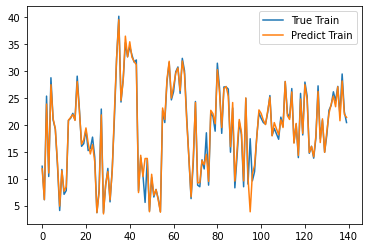

In [126]:
XbTrain = CreateXb(XTrain)
W = FindW(XbTrain, YTrain)
YhatTrain = FindYhat(XbTrain, W)
print(W)

plt.plot(YTrain, label='True Train')
plt.plot(YhatTrain, label='Predict Train')
plt.legend()

In [52]:
ErrorTrain = FindError(YTrain, YhatTrain)
print(ErrorTrain)
XbTest = CreateXb(XTest)
YhatTest = FindYhat(XbTest, W)

327.8654162361328


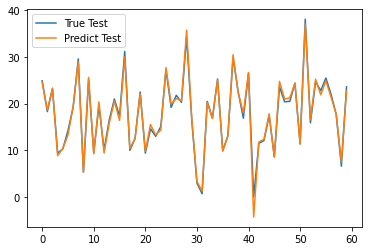

In [53]:
plt.plot(YTest, label='True Test')
plt.plot(YhatTest, label='Predict Test')
plt.legend()

In [54]:
ErrorTest = FindError(YTest, YhatTest)
print(ErrorTest)

38.97229559796787


### Making Prediction

In [55]:
Unseen = pd.read_csv('BodyFatPercent_Unseen.csv')
UnseenMatrix = Unseen.values
UnseenMatrix.shape

(52, 15)

In [56]:
UnseenX = UnseenMatrix[:, :14]
UnseenY = UnseenMatrix[:,  14:15]

UnseenXb = CreateXb(UnseenX)
UnseenYhat = FindYhat(UnseenXb, W)

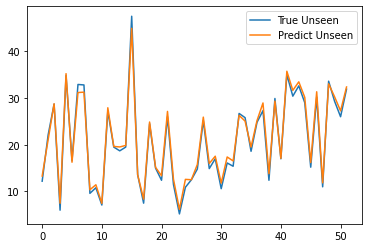

In [57]:
plt.plot(UnseenY, label='True Unseen')
plt.plot(UnseenYhat, label='Predict Unseen')
plt.legend()

In [58]:
ErrorUnseen = FindError(UnseenY, UnseenYhat)
ErrorUnseen

51.6138355965148

### use local

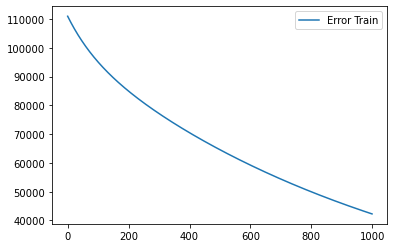

In [143]:
W, error_list  = FindWlocal(1000, 0.00002568, XbTrain, YTrain)
plt.plot(error_list, label='Error Train')
plt.legend()

In [125]:
print(W)

[[ 0.45044919]
 [-0.57481114]
 [ 0.2293744 ]
 [-0.15937618]
 [ 0.47449746]
 [-1.18298391]
 [ 0.7143132 ]
 [-0.30677708]
 [-0.10987008]
 [ 0.04023629]
 [-0.29891969]
 [-1.89329129]
 [-0.41396966]
 [ 0.42502367]
 [-0.30357867]]
